In [247]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [284]:

# Import data
df = pd.read_csv('medical_examination.csv')


Use the data to complete the following tasks in medical_data_visualizer.py:

Add an overweight column to the data. To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.  

Normalize the data by making 0 always good and 1 always bad. If the value of cholesterol or gluc is 1, make the value 0. If the value is more than 1, make the value 1.  

Convert the data into long format and create a chart that shows the value counts of the categorical features using seaborn's catplot(). The dataset should be split by 'Cardio' so there is one chart for each cardio value. The chart should look like examples/Figure_1.png.  

Clean the data. Filter out the following patient segments that represent incorrect data:
diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))
height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
height is more than the 97.5th percentile
weight is less than the 2.5th percentile
weight is more than the 97.5th percentile

Create a correlation matrix using the dataset. Plot the correlation matrix using seaborn's heatmap(). Mask the upper triangle. The chart should look like examples/Figure_2.png.

In [285]:
# Add 'overweight' column
df['overweight'] = df.weight/((df.height/100) ** 2)

df['overweight'] = df['overweight'].apply(lambda x: x >25, int(1),int(0))

# Normalize data by making 0 always good and 1 always bad. If the value of 'cholesterol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.
df[['cholesterol', 'gluc']] = df[['cholesterol', 'gluc']].apply(lambda x: x > 1, 1, 0)
df[['cholesterol','overweight', 'gluc']] = df[['cholesterol', 'overweight', 'gluc']].astype('int')
df_cat=pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])
df_cat = df_cat.groupby(['cardio', 'variable', 'value'])['value'].count().to_frame()
df_cat = df_cat.rename(columns={'value': 'count'})

df_cat = df_cat.reset_index()

# Draw Categorical Plot
def draw_cat_plot():
    # Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
    df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])


    # Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.
    df_cat = df_cat.groupby(['cardio', 'variable', 'value'])['value'].count().to_frame()
    df_cat = df_cat.rename(columns={'value': 'total'})
    df_cat = df_cat.reset_index()

    # Draw the catplot with 'sns.catplot()'
    g = sns.catplot(data=df_cat, x='variable', y='total', hue='value',col='cardio', kind='bar')

    # Get the figure for the output
    fig = g.figure


    # Do not modify the next two lines
    fig.savefig('catplot.png')
    return fig



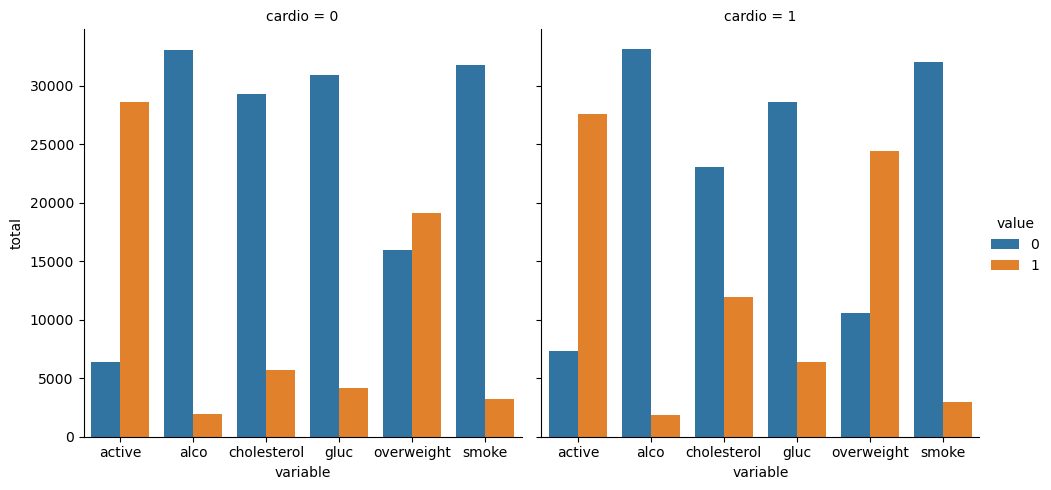

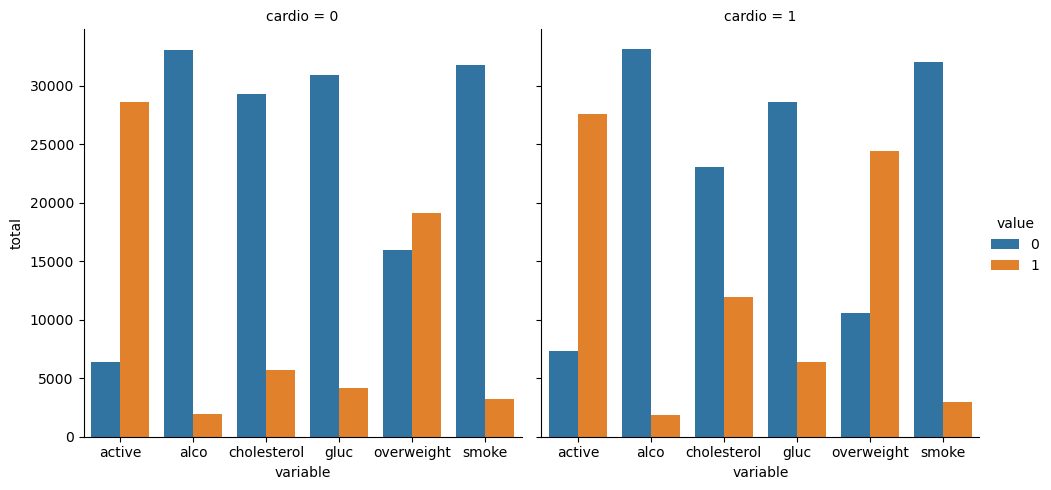

In [286]:
draw_cat_plot()

In [287]:
df.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   sex          70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
 13  overweight   70000 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 7.5 MB


In [288]:
df.ap_hi.describe()

count    70000.000000
mean       128.817286
std        154.011419
min       -150.000000
25%        120.000000
50%        120.000000
75%        140.000000
max      16020.000000
Name: ap_hi, dtype: float64

In [289]:
# pressure_check = np.where(df.ap_lo <= df.ap_hi)
# df = df.loc[pressure_check]
# height_check = np.where((df.height.quantile(0.025) <= df.height) & (df.height <= df.height.quantile(.975)))
# df = df.iloc[height_check]
# weight_check = np.where((df.weight.quantile(0.025) <= df.weight) & (df.weight <= df.weight.quantile(.975)))
# df = df.iloc[weight_check]

In [290]:
df.iloc[np.where(df.height >=df.height.quantile(0.025))]

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


In [291]:
round(df.corr(),1)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,1.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0
age,0.0,1.0,-0.0,-0.1,0.1,0.0,0.0,0.1,0.1,-0.0,-0.0,-0.0,0.2,0.1
sex,0.0,-0.0,1.0,0.5,0.2,0.0,0.0,-0.0,-0.0,0.3,0.2,0.0,0.0,-0.0
height,-0.0,-0.1,0.5,1.0,0.3,0.0,0.0,-0.0,-0.0,0.2,0.1,-0.0,-0.0,-0.1
weight,-0.0,0.1,0.2,0.3,1.0,0.0,0.0,0.1,0.1,0.1,0.1,-0.0,0.2,0.6
ap_hi,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.1,0.0
ap_lo,-0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0
cholesterol,0.0,0.1,-0.0,-0.0,0.1,0.0,0.0,1.0,0.4,0.0,0.0,0.0,0.2,0.1
gluc,0.0,0.1,-0.0,-0.0,0.1,0.0,0.0,0.4,1.0,0.0,0.0,-0.0,0.1,0.1
smoke,-0.0,-0.0,0.3,0.2,0.1,-0.0,0.0,0.0,0.0,1.0,0.3,0.0,-0.0,-0.0


In [292]:

# Draw Heat Map
def draw_heat_map():

    # Clean the data
    df_heat = df[(df['ap_lo'] <= df['ap_hi']) &
                 (df['height'] >= df['height'].quantile(0.025)) &
                 (df['height'] <= df['height'].quantile(0.975)) &
                 (df['weight'] >= df['weight'].quantile(0.025)) &
                 (df['weight'] <= df['weight'].quantile(0.975))
                 ]    

    # Calculate the correlation matrix
    corr = df_heat.corr()

    # Generate a mask for the upper triangle
    mask=np.triu(df_heat.select_dtypes('number').corr())



    # Set up the matplotlib figure
    fig, ax = plt.subplots()

    # Draw the heatmap with 'sns.heatmap()'
    sns.heatmap(data=corr, mask=mask, annot=True, fmt='.1f')


    # Do not modify the next two lines
    fig.savefig('heatmap.png')
    return fig


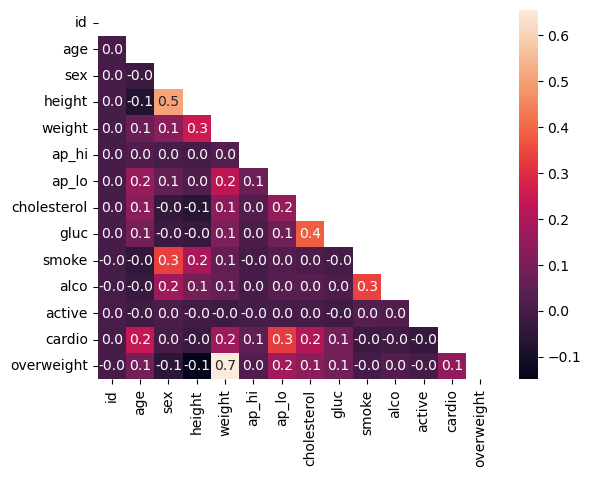

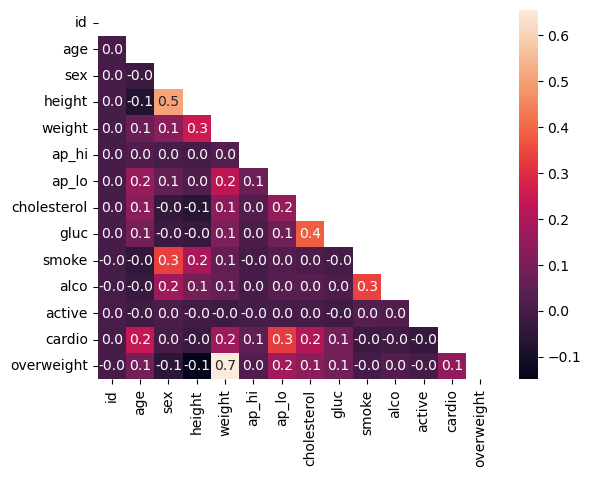

In [293]:
draw_heat_map()

<AxesSubplot:xlabel='cholesterol', ylabel='ap_lo'>

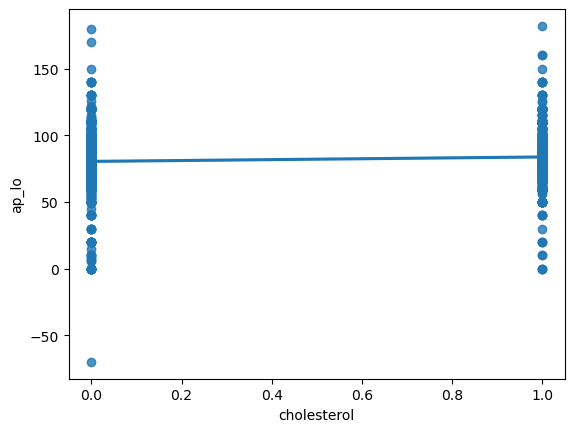

In [294]:
sns.regplot(data=df[(df['ap_lo'] <= df['ap_hi']) &
                 (df['height'] >= df['height'].quantile(0.025)) &
                 (df['height'] <= df['height'].quantile(0.975)) &
                 (df['weight'] >= df['weight'].quantile(0.025)) &
                 (df['weight'] <= df['weight'].quantile(0.975))
                 ] , x='cholesterol', y='ap_lo')